## 'Data Science' no es un botón (por ahora) 
### Ejemplos usando normalizaciones

En Data Science, existen varios pasos a seguir para realizar un modelo:
   
* Definir el problema
* Preparar los datos
* Elegir algoritmos
* Modelar
* Presentar resultados


* Definir el problema
  * Análisis exploratorio de datos
  * Calidad de los datos
* Preparar los datos
  * Selección de variables
  * Reducción de dimensionalidad
  * Normalización
* Elegir algoritmos
  * Supervisado o no supervisado
  * Tunear Parámetros
* Modelar
  * Entrenar
  * Evaluar
* Presentar resultados



## Visión no técnica de Data Science
    

<img src="imagenes/no_tecnica_0.png">


<img src="imagenes/no_tecnica_1.png">


<img src="imagenes/no_tecnica_2.png">


<img src="imagenes/no_tecnica_3.png">


<img src="imagenes/no_tecnica_4.png">


<img src="imagenes/no_tecnica_5.png">


Culpa de las GUIs: Azure, Dataiku, etc

<img src="imagenes/azure2.png">


## El botón de normalizar: cómo hacerlo bien (o al menos no hacerlo muy mal)

Normalizar en data science significa tranformar las variables para que tengan una escala concreta

Es muy importante normalizar antes de usar un modelo de machine learning.

Muchos algoritmos asignan pesos a variables en función de su valor numérico. 

Ejemplo: si una variable de longitud se mide en milímetros (números muy grandes) tendría más peso que medida en kilómetros (números más pequeños).


## ESTO ES UN PROBLEMA

## EN SERIO

Existen muchas formas de normalizar variables y no todas valen para todo

<img src="imagenes/screwdriver.jpg">


## Formas de normalizar

### Feature scaling

La variable se normaliza entre sus límites empíricos

\begin{equation}
X_{normalized} = \frac{X - X_{min}}{X_{max} - X_{min}}
\end{equation}


**Al normalizar entre los límites empíricos (máximo y mínimo de la variable), el ruido puede verse amplificado.**




#### Ejemplo

Imagina que mides el ancho de banda de una casa con fibra óptica de 30Mb durante 50 días.


----------------------------------------------------------------------------------


<img src="imagenes/telefonica.jpg" align="left" style="width: 200px;">


(0, 50)

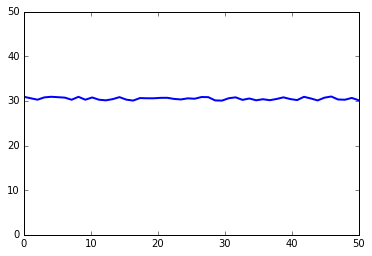

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#initialize the seed
np.random.seed(314)

# generate 50 numbers between 0 and 30
datasetFlat = np.random.rand(50) + 30

#plot them
x = np.linspace(0, len(datasetFlat))
plt.plot(x, datasetFlat, '-', linewidth=2)

#force limits on the figure
axes = plt.gca()
axes.set_ylim([0,50])

Parece bastante estable no? Normalizemos usando feature scaling...

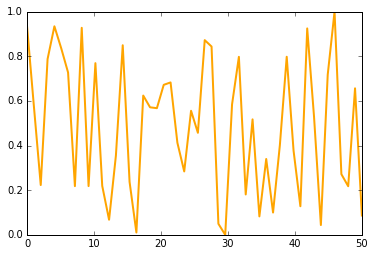

In [2]:
from sklearn.preprocessing import MinMaxScaler
#create scaler
scaler = MinMaxScaler()

#apply scaler
datasetFlatScaled = scaler.fit_transform(datasetFlat.reshape(-1,1))

#plot scaled data
plt.plot(x, datasetFlatScaled, '-', linewidth=2, color="orange")

Ahora parece una conexión con mucha variación en el servicio. El modelo que use esta variable no funcionará

**Before**

<img src="imagenes/before.jpg" style="width: 400px;">


**After**

<img src="imagenes/after.jpg" style="width: 400px;">


Ok, nuevo intento

### Standard scaler

\begin{equation}
X_{normalized} =  \frac{X - X_{mean}}{X_{std dev}}
\end{equation}

Podría funcionar para el caso anterior, pero la media y la desviación típica son muy sensibles a outliers

#### Ejemplo 2

La siguiente gráfica representa la frecuencia de uso de una determinada palabra en posts de Facebook

----------------------------------------------------------------------------------

<img src="imagenes/facebook.png" align="left" style="width: 150px;">


<img src="imagenes/facebook_0.png">


<img src="imagenes/facebook_1.png">


La frecuencia baja entre semana y tiene picos los fines de semana. Picos grandes en fiestas importantes


----------------------------------------------------------------------------------

<img src="imagenes/facebook.png" align="left" style="width: 150px;"> 
<img src="imagenes/jb.jpg" align="left" style="width: 150px;"> 

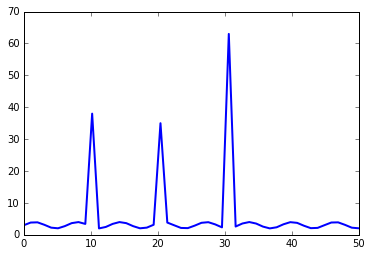

In [3]:
#generate sine wave with outliers
datasetSinOutlier = np.sin(range(0,10)).tolist() + \
                    [35] +  \
                    np.sin(range(11,20)).tolist() + \
                    [32]  +  \
                    np.sin(range(21,30)).tolist() + \
                    [60]  +  \
                    np.sin(range(31,50)).tolist() 

                
datasetSinOutlier = [i+3 for i in datasetSinOutlier]
                    
#this it used only to plot
x = np.linspace(0, len(datasetSinOutlier))

#plot
plt.plot(x, datasetSinOutlier, '-', linewidth=2)

De cara a realizar un análisis, nos gustaría poder distinguir bien entre fines de semana y días laborables. Normalizemos usando Standard Scaler

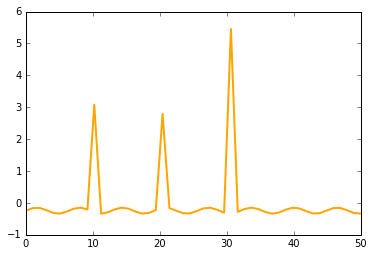

In [4]:
from sklearn.preprocessing import StandardScaler
#create scaler
scaler = StandardScaler()

#apply scaler
datasetSinOutlierScaled = scaler.fit_transform(np.array(datasetSinOutlier).reshape(-1,1))

#plot scaled data
plt.plot(x, datasetSinOutlierScaled, '-', linewidth=2, color="orange")

Resumen del destrozo:
* No ha conseguido dejar los datos entre 0 y 1 (situación ideal)
* No se distinguen los laborables de los festivos, ya que los outliers enmascaran el resto de datos
* Ha introducido números negativos donde antes no los había

## Error 404: Data Scientist not found

<img src="imagenes/time.gif"> 


Más en: [github/smorante](https://github.com/smorante/machine-learning-knowledge-pills/blob/master/data%20normalization/warnings%20about%20normalizing%20data.ipynb)

### Consejos finales

* ** Estudia los datos **

* ** No ignores a los outliers, piensa qué hacer con ellos antes de normalizar**


## Data Science no es un botón (Machine Learning tampoco)

<img src="imagenes/oprah.gif"> 



## Saber éstas de cosas es por lo que los Data Scientist están tan valorados


<img src="imagenes/bb.jpg"> 



<img src="imagenes/fry.gif"> 


Santiago Morante, PhD <br>
Data Scientist